# House predictions with linear regression

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

ModuleNotFoundError: No module named 'turicreate'

In [2]:
data = tc.SFrame('Hyderabad.csv')
data

NameError: name 'tc' is not defined

### Exploring the relationship between price and area

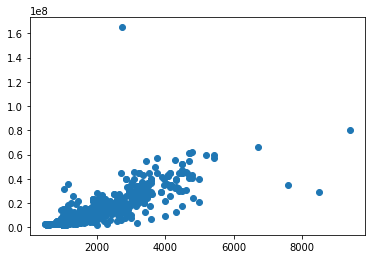

In [15]:
plt.scatter(data['Area'], data['Price'])

In [16]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003931     | 144454572.088597   | 15277985.003418      | 4972770.889067                  | 3331559.315399                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [17]:
simple_model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None | -6142578.000532893 |  246334.477353732  |
|     Area    |  None |  9704.72942252219  | 136.36994054983197 |
+-------------+-------+--------------------+--------------------+
[2 rows x 4 columns]

In [18]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9704.72942252219
y-intercept: -6142578.000532893


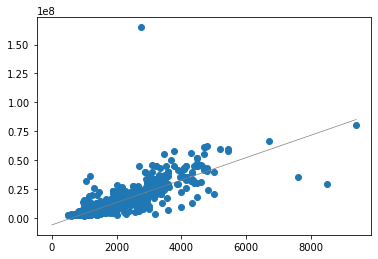

In [19]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [20]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 277

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.030911     | 140351121.523964   | 15868517.977856      | 4281011.681825                  | 2764127.471508                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [21]:
model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 277

Data:
+-------------+-------------+---------------------+--------------------+
|     name    |    index    |        value        |       stderr       |
+-------------+-------------+---------------------+--------------------+
| (intercept) |     None    | -2952247.5712972553 |  609936.129245844  |
|     Area    |     None    |  9066.799459088541  | 258.97795267488067 |
|   Location  | Hitech City |  4997916.846992685  | 777810.2035634923  |
|   Location  |  Manikonda  |  11775.133136453445 | 668824.6480154935  |
|   Location  |    Alwal    |  -676445.9023479818 | 1223527.4788180154 |
|   Location  |  Gachibowli |  4634648.314461059  | 752930.5679570116  |
|   Location  |   Tellapur  |  -991360.1129945548 | 1060369.3202242504 |
|   Location  |   Kokapet   |   531562.539111399  | 807092.7988395646  |
|   Location  | Hyder Nagar |  1702803.016624335  | 2089161.989681937  |
|   Location  | Mehdipatnam |  108380.22487745673 | 1520908.5327287214 |
+-------------+-------------+---------------------+--------------------+
[277 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [22]:
model.evaluate(data)

{'max_error': 140351121.52396426, 'rmse': 4218092.411530379}

In [23]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Columns:
	Area	int
	No. of Bedrooms	int

Rows: 1

Data:
+------+-----------------+
| Area | No. of Bedrooms |
+------+-----------------+
| 1000 |        3        |
+------+-----------------+
[1 rows x 2 columns]

In [24]:
model.predict(house)

dtype: float
Rows: 1
[2075920.8465305176]